# Linear regression in scikit-learn
(Adapted from tutorial at https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In addition to providing `numpy` for matrix algebra, Python also has a library of machine learning models available in `scikit-learn`. In this tutorial, we will learn how to train, apply, and evaluate the linear regression model available in `scikit-learn`. We will also learn how to plot the resulting models using Python's standard plotting library, `matplotlib`.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Import some real data

We will first import one of the datasets that is provided in `sklearn`. For a small example, we will only take 20 datapoints. Additionally, we will only use one of the feature columns available in the feature matrix, i.e., to study linear regression with a single explanatory variable $x$. We will also use the default functionality in `sklearn` for splitting the dataset into training and testing sets.

In [12]:
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:20,[2]]
y = y[:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[:5,:]) # Show first five data points

(15, 1) (5, 1) (15,) (5,)
[[ 0.01211685]
 [-0.04716281]
 [-0.00189471]
 [-0.03638469]
 [ 0.04445121]]


## Fit linear regression model to data

Now we will define the linear regression model, and fit the model to the training dataset. After training, we can inspect the parameters of the trained model (i.e., the coefficient and the intercept).

In [13]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Coefficients', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients [443.58293519]
Intercept 151.3857211551049


## Predict y for test (new) data points

With the trained model in hand, we can apply the model to new datapoints, i.e., those in the testing set.

In [15]:
y_pred_test = regr.predict(X_test)
print(y_pred_test.shape)
print(y_pred_test)

(5,)
[146.72046963 128.55270598 143.37377633 178.75310553 114.20973469]


## Evaluating the model: MSE and $r^2$

To assess the quality of the model, we can look at the resulting mean squared error (MSE) and coefficient of determination ($r^2$) on the testing set. `sklearn` has built in functions for these metrics.

In [16]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))

Mean squared error: 2169.59
Coefficient of determination: -1.24


Notice that our coefficient of determination is actually negative! This means that our model did a very poor job generalizing to the test set. There are a number of possible reasons for this, not the least of which is that we only used 20 datapoints in this small example. In the following, we visualize the result.

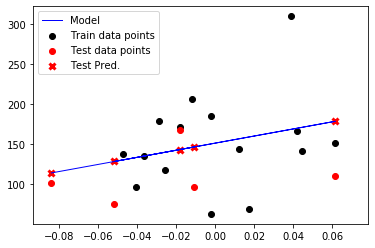

In [17]:
# Plot outputs
plt.scatter(X_train, y_train,  color='black', label='Train data points')
plt.scatter(X_test, y_test,  color='red', label='Test data points')
plt.plot(X_test, y_pred_test, color='blue', linewidth=1, label='Model')
plt.scatter(X_test, y_pred_test, marker='x', color='red', linewidth=3, label='Test Pred.')
plt.legend()
plt.show()

Looking at the difference between the red x's (predictions) and o's (actual datapoints), we can see that our predictions were pretty significantly off, which is why we have a bad $r^2$ score. A good result would have $r^2$ positive and close to $+1$.

In data science, it is very important to get used to negative results. In fact, negative results are sometimes the most interesting, as they rule out and/or falsify existing hypotheses.

## Model Normalization

In the above example, we did not normalize the data prior to training the model. Doing so is often desirable, especially for interpreting the difference in effect of model features. Below, we use `numpy` to apply our own normalization, and train the model on the normalized data.

In [18]:
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
mean_y = np.mean(y)
std_y = np.std(y)

X_train_norm = (X_train - mean_X) / std_X
y_train_norm = (y_train - mean_y) / std_y

Mean squared error: 13071.68


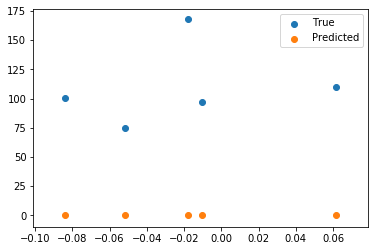

In [19]:
# Now train the model
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_norm, y_train_norm)

# Predict on the test dataset
y_pred_test = regr.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred_test, label='Predicted')
plt.legend()

This result looks really bad (even worse than the one above!). Why? Because we did not normalize the testing dataset prior to inputting it to the model. Below, we normalize the testing input, and then unnormalize the resulting prediction output.

Mean squared error: 2169.59


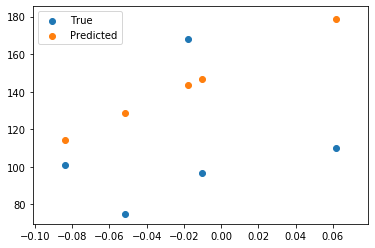

In [20]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_norm, y_train_norm)

# Normalize the input just like we did the training data!
X_test_norm = (X_test - mean_X)/std_X

y_pred_test_norm = regr.predict(X_test_norm)

# Unnormalize y after prediction!
y_pred_test = (y_pred_test_norm * std_y) + mean_y

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred_test, label='Predicted')
plt.legend()

These results look much better! When using normalization, it is important to handle it both before fitting and at test time.

Note also that while we wrote our own normalization functions here, `scikit-learn` has built in methods for handling it.